In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time

%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.7, 's' : 15, 'linewidths':3}

In [4]:
data = np.load('/content/data.npy')

In [5]:
data.shape

(510, 2)

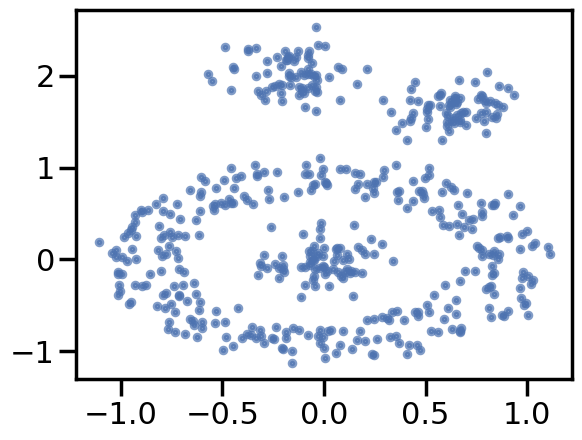

In [6]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(True)
frame.axes.get_yaxis().set_visible(True)

In [7]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('Set3', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(True)
    frame.axes.get_yaxis().set_visible(True)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=18)
    plt.text(0.1, -2.2, 'Clustering took {:.2f} s'.format(end_time - start_time),
fontsize=14)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


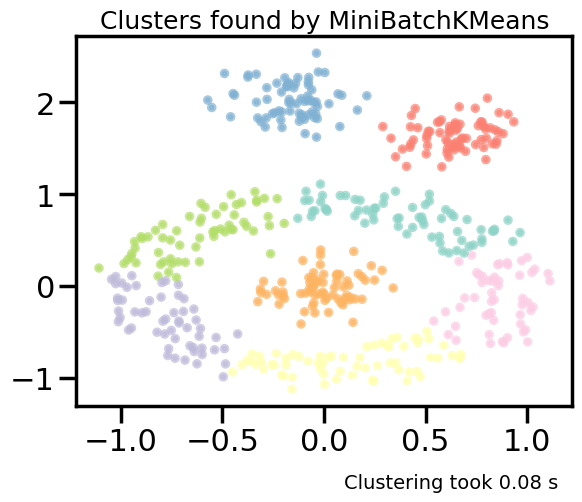

In [8]:
plot_clusters(data, cluster. MiniBatchKMeans,(), { })

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


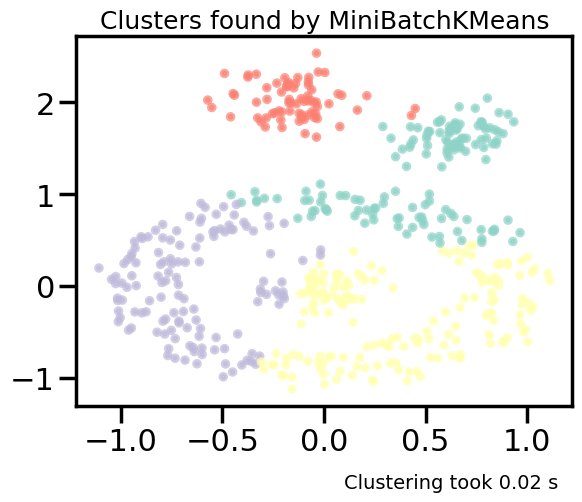

In [9]:
plot_clusters(data, cluster. MiniBatchKMeans,(), {'n_clusters':4 })

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


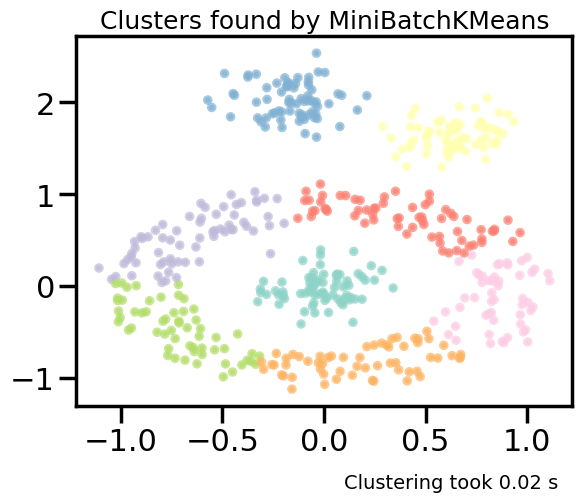

In [10]:
plot_clusters(data, cluster. MiniBatchKMeans,(), {'batch_size': 100 })

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


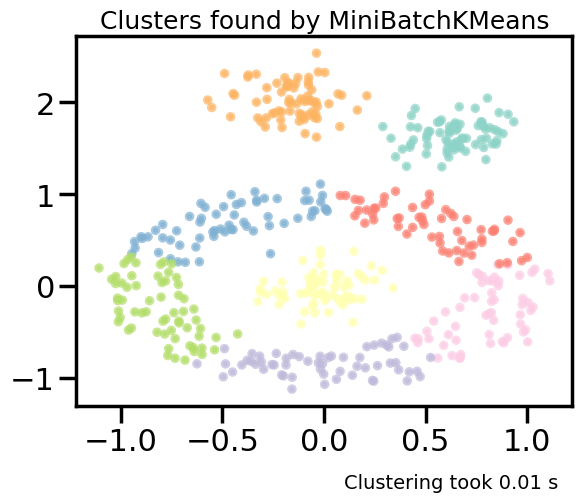

In [11]:
plot_clusters(data, cluster. MiniBatchKMeans,(), {'max_iter': 300 })

MeanShift


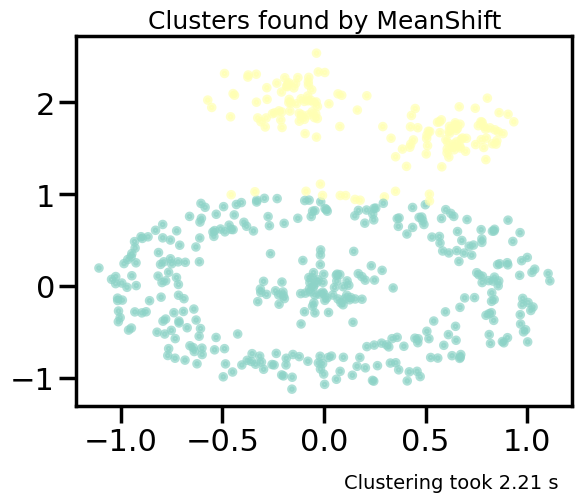

In [12]:
plot_clusters(data, cluster. MeanShift, (), {})

In [13]:
from sklearn.cluster import estimate_bandwidth

In [14]:
bandwidth = estimate_bandwidth(data)

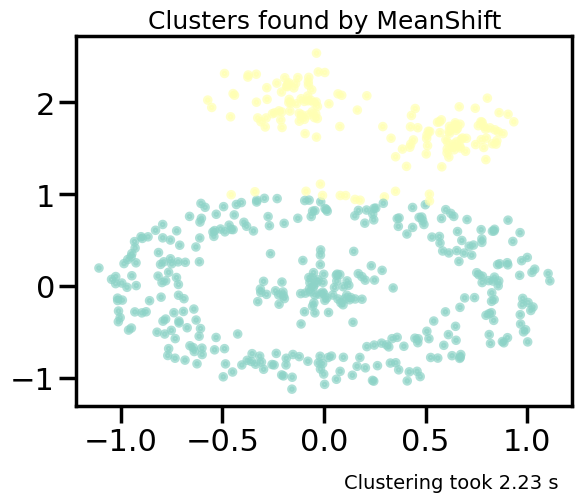

In [15]:
plot_clusters(data, cluster. MeanShift, (), {'bandwidth':bandwidth})

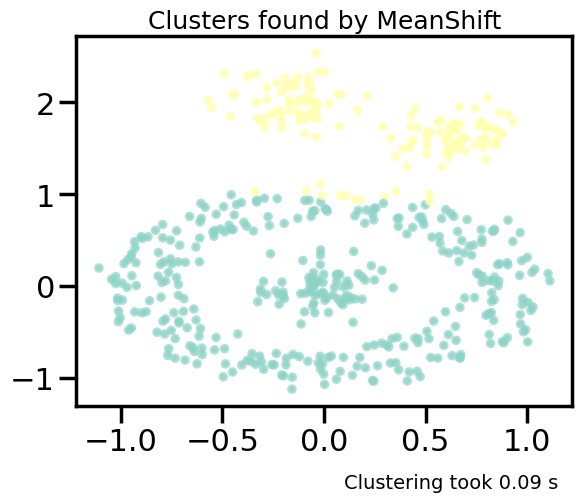

In [16]:
plot_clusters(data, cluster. MeanShift, (), {'bin_seeding':True,})

HDBSCAN


In [17]:
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [18]:
import hdbscan

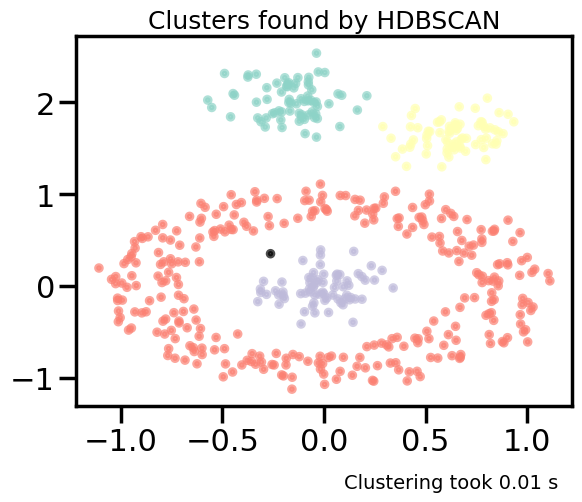

In [19]:
plot_clusters(data, hdbscan.HDBSCAN, (), {})

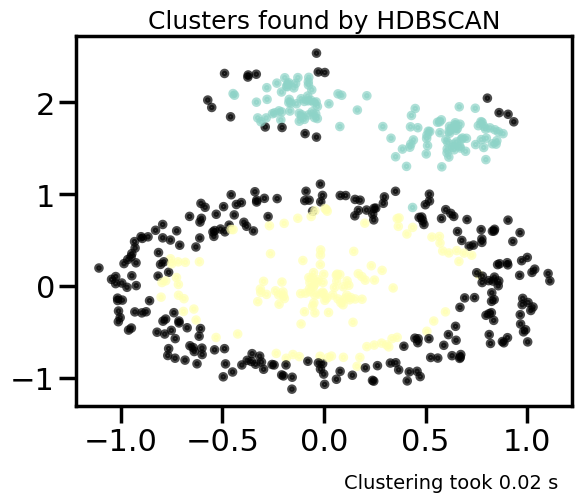

In [20]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':60
                                          })




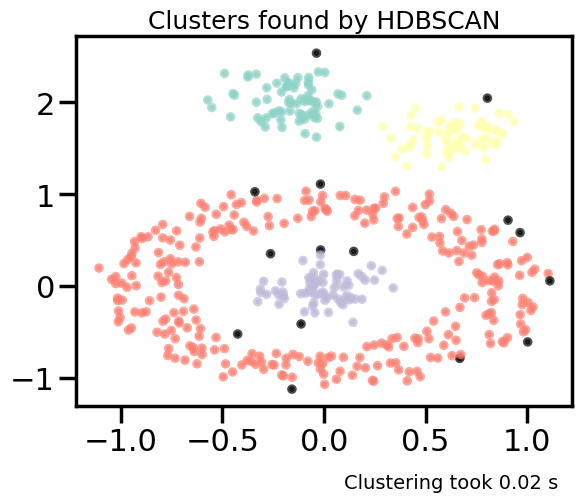

In [21]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_samples':10})

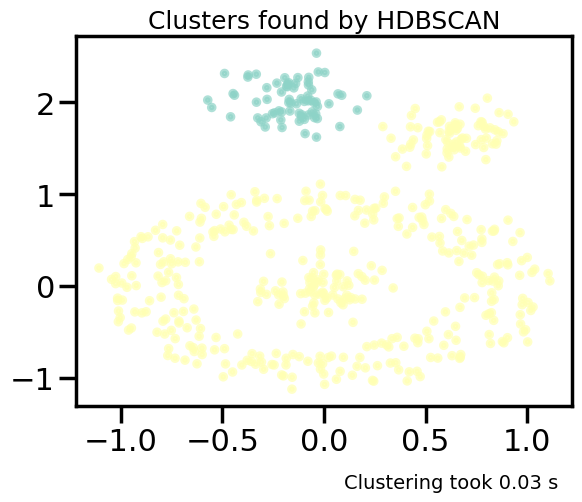

In [22]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'cluster_selection_epsilon':0.8})

https://www.researchgate.net/publication/284938375_Impact_of_Distance_Measures_on_the_Performance_of_Clustering_Algorithms#:~:text=All%20these%20studies%20conclude%20that,for%20different%20distances.%20...

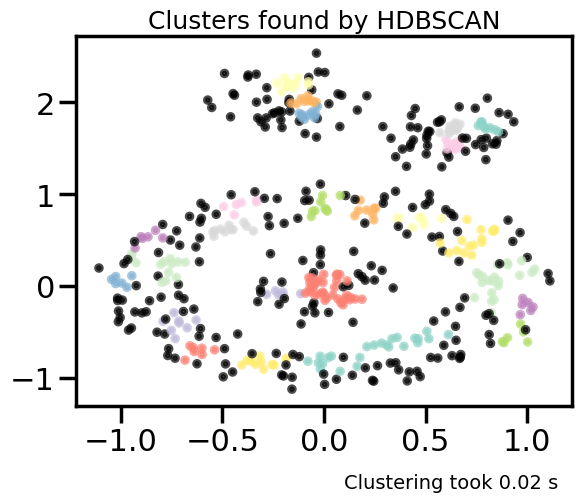

In [23]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'cluster_selection_method':'leaf'})

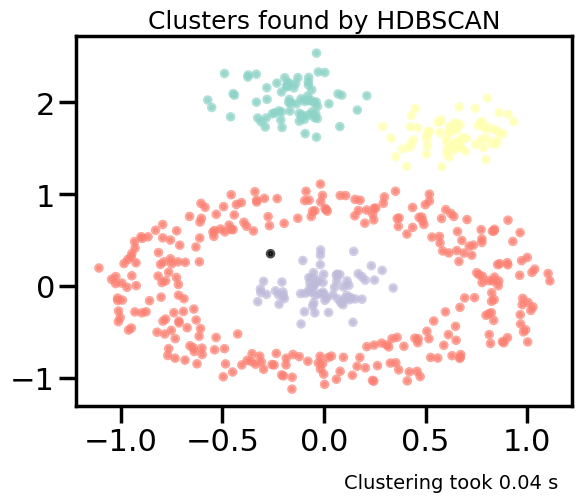

In [24]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'metric':'euclidean'})

Agglomerative Clustering


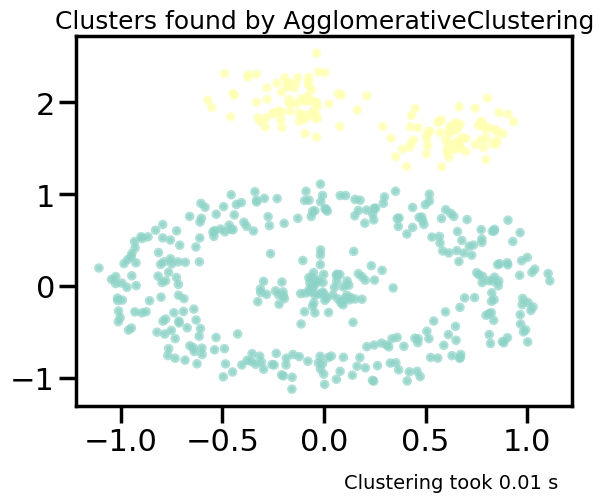

In [25]:
plot_clusters(data, cluster. AgglomerativeClustering,(), {})

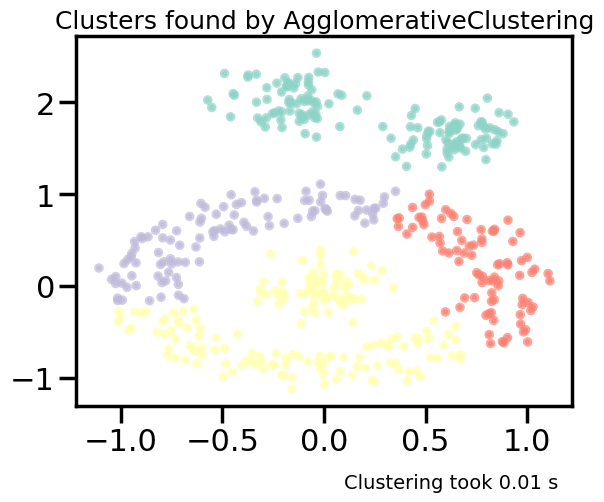

In [26]:
plot_clusters(data, cluster. AgglomerativeClustering,(), {'n_clusters':4})

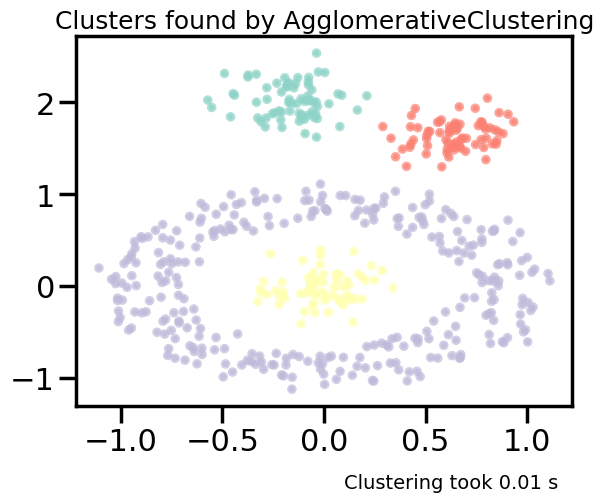

In [27]:
plot_clusters(data, cluster. AgglomerativeClustering,(), {'n_clusters':4,'linkage':'single'})

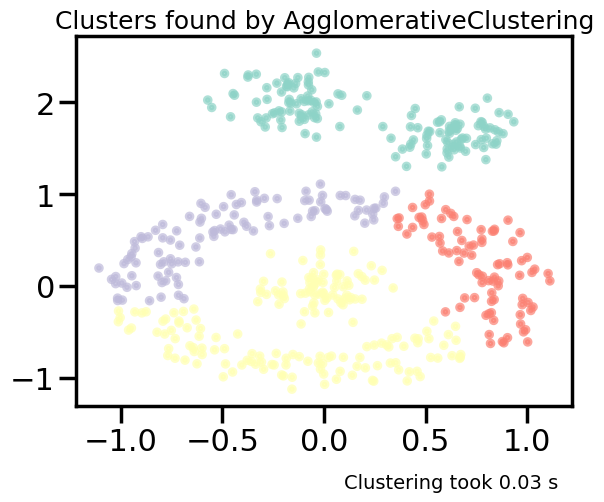

In [28]:
plot_clusters(data, cluster. AgglomerativeClustering,(), {'n_clusters':4,'linkage':'ward'})